# Segmentación de clientes según datos bancarios

### Objetivos del proyecto
El ejercicio consiste en agrupar a los clientes de tarjetas de crédito en varios grupos de acuerdo
con su comportamiento para obtener una serie de cluster que pueden ser utilizados para
desarrollar una campaña de Marketing.

Este caso requiere desarrollar una segmentación de clientes para definir la estrategia de marketing. El conjunto de datos de muestra
conjunto de datos de muestra resume el comportamiento de uso de unos 9000 titulares de tarjetas de crédito activas durante los últimos 6 meses. El archivo es a nivel de cliente con 18 variables de comportamiento.

A continuación se muestra el diccionario de datos para el conjunto de datos de tarjetas de crédito :

* CUST_ID : ID del titular de la tarjeta de crédito (Categórico)
* BALANCE : Importe del saldo restante en su cuenta para realizar compras
* BALANCE_FREQUENCY : Frecuencia con la que se actualiza el saldo, puntuación entre 0 y 1 (1 = se actualiza con frecuencia, 0 = no se actualiza con frecuencia)
* COMPRAS : Importe de las compras realizadas con cargo a la cuenta
* ONEOFF_PURCHASES : Importe máximo de las compras realizadas de una sola vez
* COMPRAS_COMPRAS : Importe de las compras realizadas a plazos
* CASH_ADVANCE : Efectivo adelantado por el usuario
* PURCHASES_FREQUENCY : Frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras poco frecuentes)
* FREQUENCY OF ONE-TIME PURCHASES : frecuencia con la que se realizan compras de una sola vez (1 = compras frecuentes, 0 = compras infrecuentes)
* FRECUENCIA DE LAS COMPRAS APLAZADAS: Frecuencia con la que las compras se realizan a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia).
* FRECUENCIA DE PAGO EN EFECTIVO POR ADELANTADO : Frecuencia con la que se paga en efectivo por adelantado
* CASHADVANCETRX : Número de transacciones realizadas con "Efectivo por adelantado".
* PURCHASES_TRX : Número de transacciones de compra realizadas
* CREDIT_LIMIT : Límite de la tarjeta de crédito del usuario
* PAGOS : Importe de los pagos realizados por el usuario
* PAGOS_MÍNIMOS : Importe mínimo de pagos realizados por el usuario
* PRCFULLPAYMENT : Porcentaje del pago total abonado por el usuario
* TENURE : Tenencia del servicio de tarjeta de crédito para el usuario

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import sklearn.neighbors
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
# --- Importing Dataset ---
df = pd.read_csv('general.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Estudio de datos

Para empezar a trabajar con los datos vamos a borrar la columna de id ya que es un campo unico, para el problema que tenenmos que resolver no nos hace falta este campo.

In [3]:
# eliminar la columna CUST_ID de valor unico
df = df.drop('CUST_ID', axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Matriz de correlacion

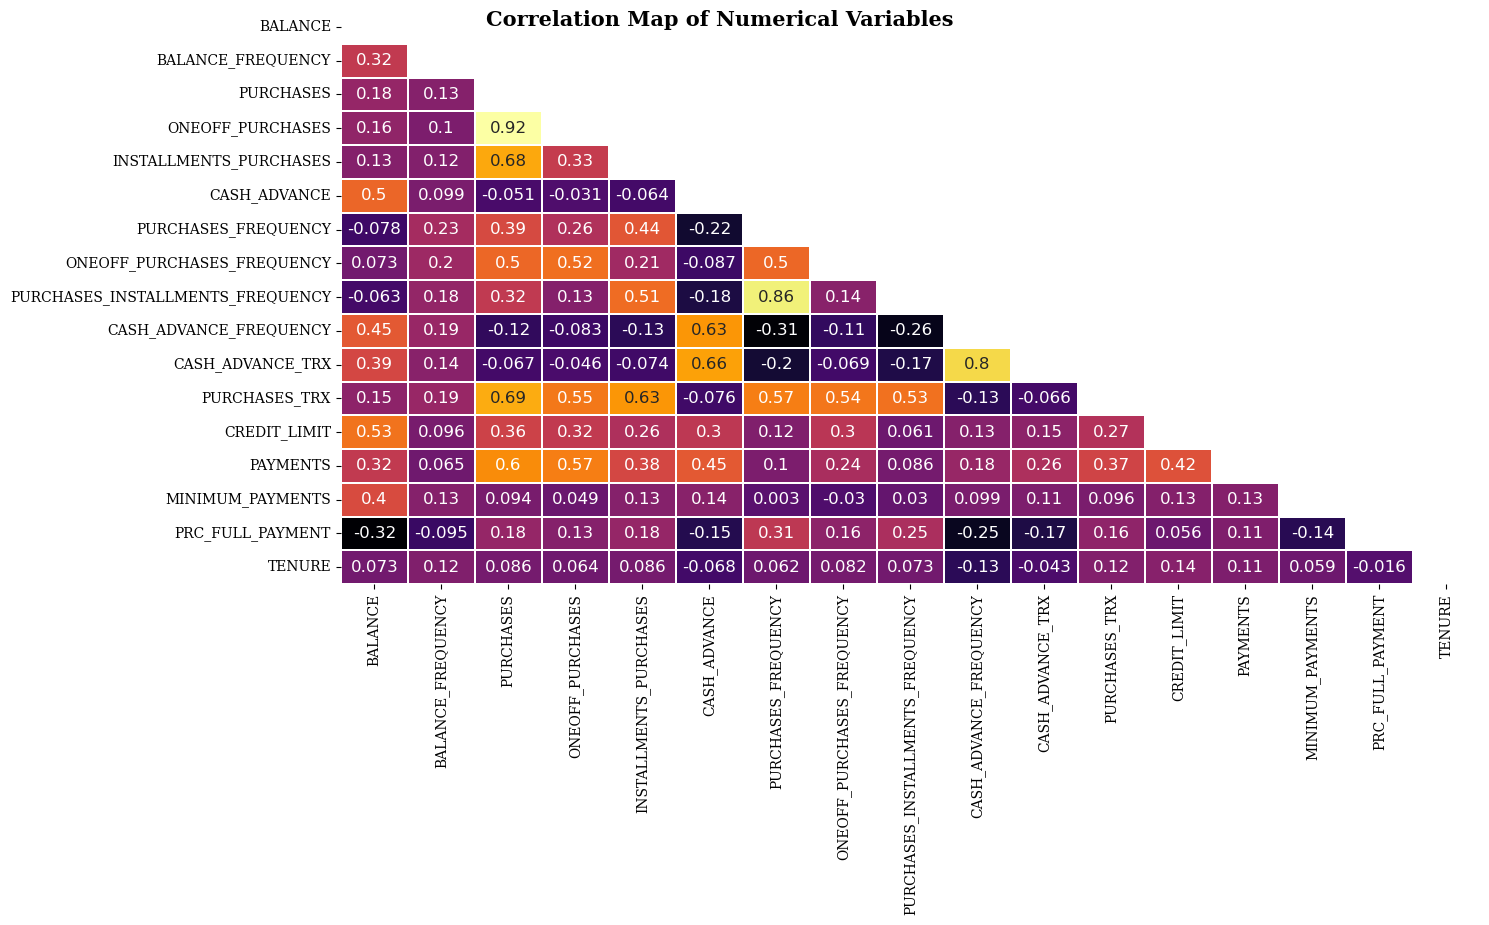

In [4]:
# --- Correlation Map (Heatmap) ---
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='inferno', linewidths=0.1, cbar=False, annot_kws={"size":12})
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=10, fontfamily='serif')
ax.set_yticklabels(ylabels, size=10, fontfamily='serif')
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', x=0.327, y=0.96, ha='left', fontsize=15, fontfamily='serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.show();

### Resultado

In [5]:
# creamos una funcion que recorra el df para comprovar si hay valores NaN
if df.isna().any(axis=0).any():
    print('Hay NaN en el DataFrame')
else:
    print('No hay NaN en el DataFrame')

Hay NaN en el DataFrame


In [6]:
mask = df.isna().any(axis=1)
rows_with_nan = df[mask]
rows_with_nan

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [7]:
df = df.fillna(value=0)

Podemos ver que en la columna (MINIMUM_PAYMENTS) que es en donde esta los valores null, identificamso un patron que es que en la columna (PRC_FULL_PAYMENT) estan a cero por lo que podemos concluir que al no realizar ningun pago con la targeta no se les puede aplicar el pago por el uso de la misma. Para solucionar esto colocamos los valores a cero.

## PCA

El análisis de componentes principales (ACP) es un método utilizado en el aprendizaje automático no supervisado (como el clustering) que reduce los datos de alta dimensión a dimensiones más pequeñas preservando tanta información como sea posible. Al utilizar el PCA antes de aplicar el algoritmo de clustering, permite reducir las dimensiones, el ruido de los datos y disminuir el coste computacional. En este cuaderno, el número de características se reducirá a 2 dimensiones para poder visualizar los resultados del clustering.

In [8]:
from sklearn import preprocessing 

min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(df)
scaled

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82589598e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40347264e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20986681e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07868682e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29726416e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15552072e-03, 0.00000000e+00, 0.00000000e+00]])

In [9]:
# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(scaled)
print(pca.explained_variance_ratio_) # muestra el porcentaje de varianza explicado por cada una de las componentes principales.

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5'], index=df.columns)

[0.4960035  0.14054441]


,PC-1,PC-2
BALANCE,-0.015030,0.098809
BALANCE_FREQUENCY,0.101779,0.266384
PURCHASES,0.032821,0.047623
ONEOFF_PURCHASES,0.019989,0.058492
INSTALLMENTS_PURCHASES,0.035333,-0.002203
CASH_ADVANCE,-0.016895,0.013359
PURCHASES_FREQUENCY,0.685501,0.080538
ONEOFF_PURCHASES_FREQUENCY,0.242630,0.822755
PURCHASES_INSTALLMENTS_FREQUENCY,0.637191,-0.423183
CASH_ADVANCE_FREQUENCY,-0.074095,0.055929


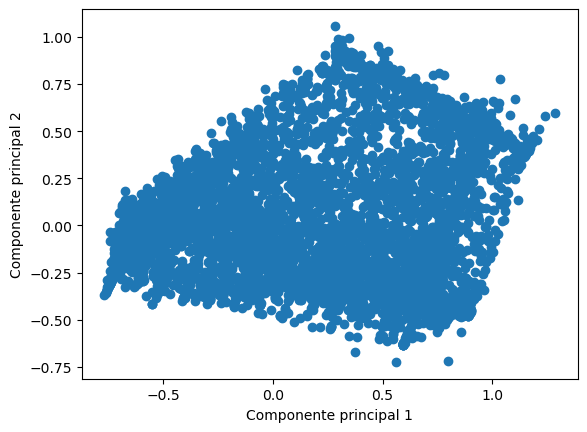

In [10]:
# Graficar los datos reducidos a 2 dimensiones
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

Hemos empleado la distancia Euclidea para calcular la matriz de distancia entre todos los elementos. Para construir el dendograma, en primer lugar, es necesario calcular las distancias entre los elementos más cercanos de cada par de clusters (distancia intercluster). Recordemos que se pueden utilizar varios enfoques, los más comunes son: el vecino más próximo (single), el vecino más alejado (complete) y la mínima varianza (ward). Hemos decidido utilizar como distancia intercluster el vecino más alejado porque la el vecino más próximo es sensible a los valores atípicos, y nuestros datos tienen algunos de ellos, por lo que el resultado obtenido no sería descriptivo.

Hemos decidido que 8 es un buen valor en estos datos. Tener en cuenta que no hay una solución correcta.

c:\Users\Pablo\anaconda3\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


Distancia Media	   1.07


C:\Users\Pablo\AppData\Local\Temp\ipykernel_3076\3181447517.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


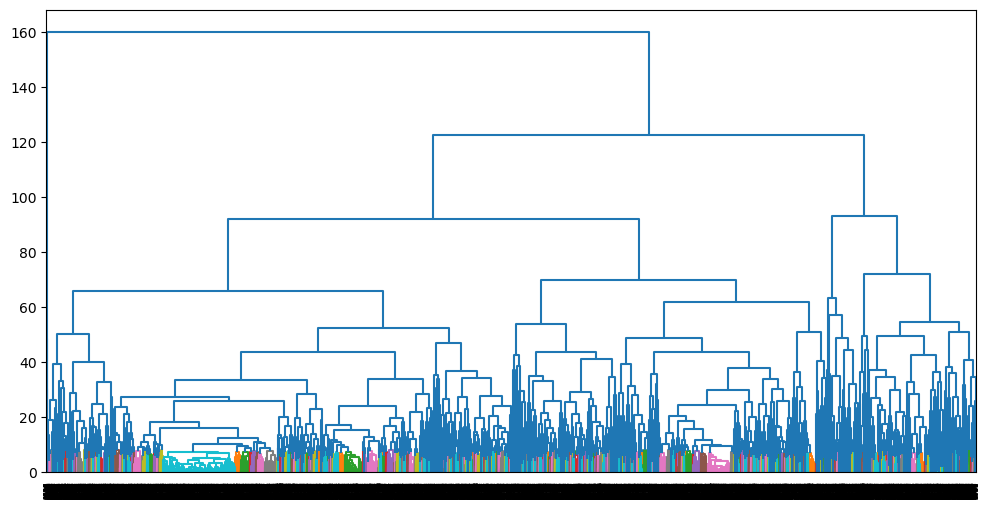

In [17]:
## Clustering jerárquico
# 1. Obtener la matriz de distancia entre todos los elementos
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(scaled)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

# 2. Constuimos el dendograma	
from scipy import cluster
plt.figure(figsize=(12, 6))
# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=8)
plt.show()

In [12]:
# 3. Obtenemos el grupo al que pertenece cada observación
threshold = 15 # ad-hoc
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

# ¿Cuántos grupos hay? Contamos el número de "labels" distintas en el vector
print("Número de clusters {}".format(len(set(labels))))
labels

Número de clusters 396


array([ 63,  50, 256, ..., 359, 305, 293], dtype=int32)

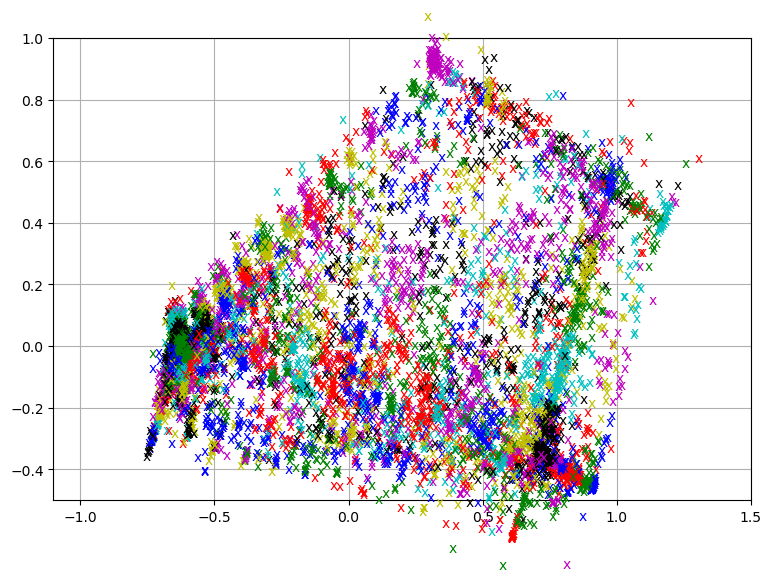

In [13]:
colores = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colores = np.hstack([colores] * 20)

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colores[labels[i]])  
plt.xlim(-1.1, 1.5)
plt.ylim(-0.5, 1)  
plt.grid()
plt.show()

## DBSCAN

In [14]:
from sklearn.cluster import DBSCAN

X = df

minPts = 3
epsilon = 1

dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
labels = dbscan.fit_predict(X)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print ('Number of clusters %d' % n_clusters)

Number of clusters 0


Clientes del cluster -1:
           BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
71     2990.422186           0.909091    4523.27           1664.09   
122    2114.158683           1.000000    5580.85              0.00   
125    2392.917738           1.000000   12462.44          12462.44   
138   19043.138560           1.000000   22009.92           9449.07   
158    2765.748281           1.000000    7283.31           5087.31   
...            ...                ...        ...               ...   
7378   4228.417754           1.000000   11994.71          11994.71   
7553   2017.391656           1.000000   12024.37          11224.10   
8461    919.563867           1.000000    3000.00              0.00   
8541   3326.323283           1.000000    8209.77           2218.28   
8737   2533.618119           0.909091    5633.83           2985.92   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
71                   2859.18  27296.485760             0.666667   


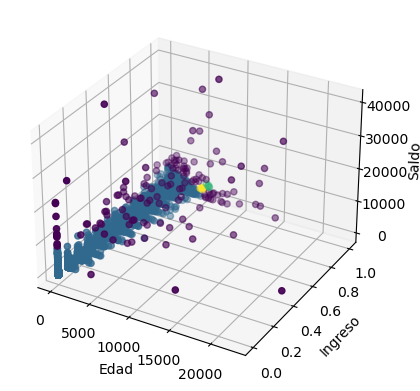

In [15]:
X = df[['INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Agregar la columna de cluster al DataFrame original
df['Cluster'] = clusters

# Agrupar el DataFrame por cluster y seleccionar los clientes de cada cluster
for cluster_id, group in df.groupby('Cluster'):
    print(f"Clientes del cluster {cluster_id}:")
    print(group)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['INSTALLMENTS_PURCHASES'], X['PURCHASES_INSTALLMENTS_FREQUENCY'], X['ONEOFF_PURCHASES'], c=clusters)
ax.set_xlabel("Edad")
ax.set_ylabel("Ingreso")
ax.set_zlabel("Saldo")
plt.show()

Podemos observar que la mayoría de los clientes pertenecen al cluster 0 (puntos rojos), mientras que los clusters 1 (puntos azules) y 2 (puntos verdes) tienen un número menor de clientes. Los clusters 3 y 4 tienen solo un cliente cada uno. Es importante tener en cuenta que, como se trata de un algoritmo de clustering basado en la densidad de los datos, es posible que algunos puntos que no están muy alejados del resto de puntos de un cluster, pero que están aislados, se asignen a un nuevo cluster.

## Descarga de resultados en un exel

In [16]:
# Obtener los datos originales y los clusters asignados
X = df[['INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Agregar la columna de cluster al DataFrame original
df['Cluster'] = clusters

# Crear un objeto ExcelWriter para escribir en un archivo de Excel
writer = pd.ExcelWriter('resultados_clusters.xlsx', engine='xlsxwriter')

# Escribir los datos de cada cluster en hojas separadas
for cluster_id, group in df.groupby('Cluster'):
    # Escribir los datos en la hoja correspondiente
    group.to_excel(writer, sheet_name=f"Cluster {cluster_id}", index=False)

# Guardar y cerrar el archivo de Excel
writer.save()